<h1>Ontologies and Linked biomedical data: A tutorial</h1>

<p>This session will be a guided hands-on tour that will show you how ontologies and APIs can be used to link and analyze biomedical data.
We will make heavy use of data and resources of the <a href="https://monarchinitiative.org/" __target="__blank">Monarch
Initiative</a> including the <a href="https://hpo.jax.org/app/">Human Phenotype Ontology</a>. We will use this Python 
notebook and indicate places where workshop participants can modify the notebook to ask their own questions. We
will not attempt to teach you Python, but we will explain what you need to know for this workship on an ad hoc basis.</p>

<h3>Using this notebook at home</h3>
<p>One of the hardest things about Python is the fact there are so many versions and environments that are not mutually compatible.
We have set up everything today so that hopefully it will just work, but you will very probably need to do some
additional work to get this notebook to run on your own laptop. We recommend using the 
<a href="https://anaconda.org/anaconda/python" target="__blank">Anaconda</a> package and version 3.6 or higher of Python.
Assuming you have installed Python, you will need to install the libraries needed by the notebook to work. <p>
<p>For instance, to install requests, you would start anaconda and install it as follows (assuming you had previously created a Python 3 environment with a command <tt>conda create --name pyth3 python=3</tt>.
    <pre>
    $ source activate pyth3
    $ conda install requests
    </pre>
    </p>
<p>
    This will not work for packages that are not represented in the Anacoda distribution. One important package
    for the following is 
    <a href="https://ontobio.readthedocs.io/en/latest/" target="__blank">ontobio</a>. To install this package, 
    simply use pip3.
    <pre>
    $ pip3 install ontobio
    </pre>
    You will need to install the following packages unless they happen to have been previously installed.
    <table>
    <tr><td>ontobio</td></tr>
    <tr><td>pymongo</td></tr>
    <tr><td>plotly</td></tr>
    <tr><td>requests</td></tr>
     <tr><td>json</td></tr>
      <tr><td>networkx</td></tr>
    </table>
    Following this, restart the notebook (if necessary).
    </p>
    

<h3>Python scripts and libraries</h3>
<p>Python is a popular scripting language that offers an extensive collection of libraries and resources for machine learning and
interacting with biomedical ontologies. This file is a Jupyter notebook, which is a web application that allows you to create and share 
documents that contain live Python code, equations, visualizations and narrative text. Python scripts usually
begin by importing libraries that perform specific functions. For instance, the following <tt>import pprint</tt> command
imports functions from the <a href="https://docs.python.org/3/library/pprint.html" target="__blank">Pretty Print</a>
library that print certain kinds of text with indentations.</p>

In [1]:
import requests
import json
from pprint import pprint
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=UserWarning)
    import matplotlib,networkx

<h1>APIs</h1>
API stands for <em>Application Programming Interface</em>. API can have many meanings in computer science,
but for today we are interested in Web APIs, i.e., internet servers that
 receive requests and send responses. Many Web APIs send responses formated as <a href="https://en.wikipedia.org/wiki/JSON" target="__blank">JSON</a>
    (JavaScript Object Notation). JSON is not the same as JavaScript (a programming language intended for Web browsers). The following shows an
    example of how to retrieve data about 
    <a href="https://www.genenames.org/cgi-bin/gene_symbol_report?hgnc_id=HGNC:1097" target="__blank">BRAF1</a> from the Human Gene Nomenclature Committee (HGNC) API.</p>
  <p>We will not delve into JSON format here (although questions are welcome). Suffice it to say that JSON provides
   a hierarchical structure for lists and dictionaries of key-value pairs that make it straightforward to organize and transmit relatively complex data structures. For those who want to learn more about converting Python objects to JSON strings and vice versa, this <a href="http://zetcode.com/python/simplejson/" target="__blank">simple tutorial</a> is recommended.</p>
    
    
    

In [2]:
uri = 'http://rest.genenames.org/fetch/hgnc_id/1097'
headers = { 'Accept': 'application/json' }
r = requests.get(uri,headers=headers)
mydict=json.loads(r.text)
pprint (mydict['response'])

{'docs': [{'_version_': 1607383169398472710,
           'alias_symbol': ['BRAF1'],
           'ccds_id': ['CCDS5863', 'CCDS87555'],
           'cosmic': 'BRAF',
           'date_approved_reserved': '1991-07-16T00:00:00Z',
           'date_modified': '2018-07-29T00:00:00Z',
           'date_name_changed': '2014-06-26T00:00:00Z',
           'ena': ['M95712'],
           'ensembl_gene_id': 'ENSG00000157764',
           'entrez_id': '673',
           'gene_family': ['Mitogen-activated protein kinase kinase kinases',
                           'RAF family'],
           'gene_family_id': [654, 1157],
           'hgnc_id': 'HGNC:1097',
           'iuphar': 'objectId:1943',
           'location': '7q34',
           'location_sortable': '07q34',
           'locus_group': 'protein-coding gene',
           'locus_type': 'gene with protein product',
           'lsdb': ['LRG_299|http://ftp.ebi.ac.uk/pub/databases/lrgex/LRG_299.xml'],
           'mgd_id': ['MGI:88190'],
           'name': 'B-Raf pro

<h1>Using Biolink to query for Mendelian diseases associated with Nephroblastoma</h1>
<p>At this point in the workshop, we will turn to a presentation about the 
    <a href="https://hpo.jax.org/app/" target="__blank">Human Phenotype Ontology (HPO)</a> before proceeding.
We will use the HPO to explore clinical data surrounding selected cancer predisposition syndromes.</p>
<p>...</p>
<h2>Using Monarch APIs to access clinical and translational data</h2>
<p>We will use the <a href="https://github.com/biolink/ontobio" target="__blank">ontobio API</a> to access
    HPO data in this notebook. It is not important for you to understand all of the steps to use the notebook, 
    but please run each of the cells as we go along (this will be explained in the workshop).</p>

In [3]:
import ontobio
from ontobio import OntologyFactory

/home/peter/bin/anaconda3/lib/python3.6/site-packages/cachier/mongo_core.py:24: UserWarning: Cachier warning: pymongo was not found. MongoDB cores will not work.
  "Cachier warning: pymongo was not found. MongoDB cores will not work.")
/home/peter/bin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<h2>Getting the HPO data via API and initializing the ontology software objects</h2>
<p>The following code gets the HPO from the OntoBee SPARQL server
(which may take 10 sec the first time you run the code;afterwards it is cached). For the purposes
    of this workshop, we will concentrate on a simplified version of the HPO that uses only subclass relations between the terms

In [4]:
# Get the HPO using default method (currently OntoBee SPARQL)
## This may take 5-10s the first time you run it; afterwards it is cached
ofa = OntologyFactory()
ont = ofa.create('hp')
ont = ont.subontology(relations='subClassOf')
## Get the root of the abnormality subset
[root] = ont.search('Phenotypic abnormality')
root

'HP:0000118'

<h2>Retrieving a term with the ontobio API</h2>
<p>We can now retrieve terms by passing their label to the API. For instance, the following command retrieves the term ID for <a href="https://hpo.jax.org/app/browse/term/HP:0001166" target="__blank">Arachnodactyly</a>.


In [5]:
## Arbitrary term
[t] = ont.search('Arachnodactyly')
pprint (t)

'HP:0001166'


<h2><font color="red">Exercise</font></h2>
<p>Adapt the command above to search for the term ID for the HPO term for 
<a href="https://hpo.jax.org/app/browse/term/HP:0000347" target="__blank">Micrognathia</a>. To do this, click on the 
grey box, alter the text, and click on the 'Run' button at the top of the page.</p>

<h2>Showing paths in the HPO</h2>
<p>Ontologies contain a list of concepts (similar to terminologies), but also specify the relations between individual concepts.
The HPO has subclass relations. For instance, 
<a href="https://hpo.jax.org/app/browse/term/HP:0005280" target="__blank">Depressed nasal bridge</a> is a subclass of
<a href="https://hpo.jax.org/app/browse/term/HP:0000422" target="__blank">Abnormality of the nasal bridge</a>.
We can display the concepts and relations and nodes and edges in a graph.</p>

In [6]:
from networkx import nx
import matplotlib.pyplot as plt
G = ont.get_graph()
[root] = ont.search('Phenotypic abnormality')  ## Root of ontology
[t1] = ont.search('Depressed nasal bridge')
ancs1 = ont.ancestors(t1, reflexive=True)  ## Get ancestors of Depressed nasal bridge
ancs1 = [a for a in ancs1 if a.startswith('HP:')]
[t2] = ont.search('Prominent nasal bridge')
ancs2 = ont.ancestors(t2, reflexive=True)  ## Get ancestors of Prominent nasal bridge
ancs2 = [a for a in ancs2 if a.startswith('HP:')]
ancs=list(set(ancs1)|set(ancs2)) # combine the two lists
ancs

['HP:0000152',
 'HP:0000366',
 'HP:0000234',
 'HP:0000271',
 'HP:0000426',
 'HP:0000118',
 'HP:0000001',
 'HP:0005280',
 'HP:0000422']

/home/peter/bin/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/peter/bin/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/peter/bin/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


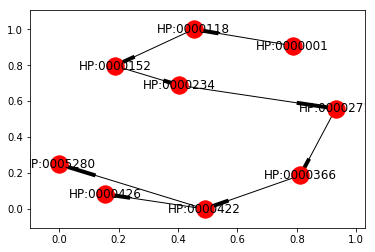

In [7]:
## Make a sub-ontology with just term and ancestors

subont = ont.subontology(ancs)
nx.draw_networkx(subont.get_graph())
plt.show()

<h2>Show all Mendelian diseases characterized by Nephroblastoma</h2>
<p>The HPO project includes not only the ontology but also a rich set of disease annotations for a total of about 7000
rare diseases. We can use the API to retrieve a list of diseases associated with any of the HPO terms.</p>

In [8]:
from ontobio.assoc_factory import AssociationSetFactory
afactory = AssociationSetFactory()

In [9]:
HUMAN='NCBITaxon:9606'
aset=afactory.create(ontology=ont, subject_category='disease',object_category='phenotype',taxon=HUMAN)

In [10]:
[t]=ont.search('Nephroblastoma')
diseases=aset.query([t])
print('Number of diseases associated with Nephroblastoma:',len(diseases))

Number of diseases associated with Nephroblastoma: 110


In [11]:
["{} '{}'".format(d, aset.label(d)) for d in diseases][1:10]

["MONDO:0005062 'lymphoma'",
 "MONDO:0003544 'spinal cord cancer'",
 "MONDO:0005941 'retroperitoneal cancer'",
 "MONDO:0006854 'mesenchymoma'",
 "MONDO:0009994 'alveolar rhabdomyosarcoma (disease)'",
 "MONDO:0012817 'Ewing sarcoma'",
 "MONDO:0006974 'small cell sarcoma'",
 "MONDO:0003119 'histiocytoid hemangioma'",
 "MONDO:0002601 'teratoma'"]

In [12]:
print(aset)

AssocSet |S|=10892 |S->I|=10892


In [13]:
z, xlabels, ylabels = aset.similarity_matrix(diseases, diseases)
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
trace = go.Heatmap(z=-np.array(z),
                       x=xlabels,
                       y=ylabels)
#py.iplot([trace], filename='labelled-heatmap')
trace

ModuleNotFoundError: No module named 'plotly'

In [14]:
import plotly

ModuleNotFoundError: No module named 'plotly'